(chap-spatialjoin)=
# Aufgabe 15: Spatial Join

## Theorie

In dieser Aufgabe wollen wir für jeden Zeckenstich ermitteln, ob er sich im Wald befindet oder nicht. Den Wald Layer kennt ihr bereits aus dem Block "Datenqualität und Unsicherheit" und wir haben ihn in {ref}`chap-pythongis-formate` kurz angeschaut. Nutzen wir hier nochmal die Gelegenheit, um den Wald und die Zeckenstiche (siehe {numref}`table-datensaetze`) als Geodaten einzulesen und in einer grossem Plot zu visualisieren.

Wie ihr schon in vorherigen Plots von mir bemerkt hat, nutze ich manchmal `pyplot` aus `matplotlib` (importiert mit alias `plt`) wenn ich etwas mehr flexibiltät haben möchte in meinen plots. Wir werden diese Visualisierungtechnik nicht weiter in diesem Kurs, kopiert einfach den entsprechenden Code in euer Notebook.

<AxesSubplot:>

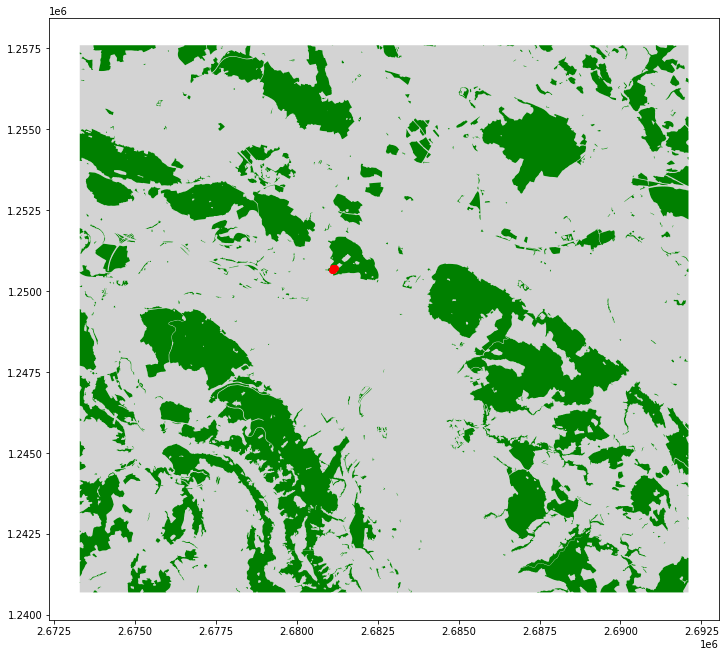

In [2]:
from matplotlib import pyplot as plt
import geopandas as gpd
zeckenstiche_gpd = gpd.read_file("data/zeckenstiche.gpkg")
wald = gpd.read_file("data/wald.gpkg")

# Subplots mit 1 Zeile und 1 Spalte
fig, ax = plt.subplots(1, 1, figsize = (12,12))
wald.plot(color = ["Lightgray","Green"], ax = ax)
zeckenstiche_gpd.plot(color = "Red", ax = ax)

### Wie funktioniert ein *Spatial Join*?

In {ref}`chap-pythongis` habt ihr euch mit den GIS-Funktionalitäten von `geopandas` vertraut gemacht. Eine ganz zentrale Funktion in GIS sind die sogenannten "Spatial Joins". Dabei werden Attribute von einem Geodatensatz auf einen anderen Geodatensatz aufgrund einer räumlichen Beziehung der beiden Datensätze übertragen. Konkret auf unsere Zeckenstiche bedeutet dies: Jedem Zeckenstich sollte die Eigenschaft "Wald: ja" / "Wald: nein" aus `wald` zugewiesen werden. Am einfachsten lässt sich dies in einer Darstellung erklären:

```{figure} figures/spatialjoin.jpg
:name: spatialjoin

"Spatial Join" zwischen `zeckenstiche` und `wald`. In diesem Spatial Join wurde die Geometrie von `zeckenstiche` übernommen, das heisst das Resultat des Joins ist ein Punkt-Layer.
```

In Python wird ein *Spatial Join* zwischen `zeckenstiche` und `wald` wie folgt durchgeführt (wichtig ist dabei auch die Reihenfolge der Argumente: `left_df` bestimmt den Geometrietyp des Outputs):

In [3]:
gpd.sjoin(left_df = zeckenstiche_gpd, right_df = wald)

,ID,accuracy,x,y,geometry,index_right,Shape_Area,Wald_text
0,2550,439.128951,2681116,1250648,POINT (2681116.000 1250648.000),0,2.380876e+08,nein
1,10437,301.748542,2681092,1250672,POINT (2681092.000 1250672.000),0,2.380876e+08,nein
2,9174,301.748542,2681128,1250683,POINT (2681128.000 1250683.000),0,2.380876e+08,nein
3,8773,301.748542,2681111,1250683,POINT (2681111.000 1250683.000),0,2.380876e+08,nein
4,2764,301.748529,2681131,1250692,POINT (2681131.000 1250692.000),0,2.380876e+08,nein
5,2513,301.748529,2681171,1250711,POINT (2681171.000 1250711.000),1,7.963237e+07,ja
6,9185,301.748542,2681107,1250712,POINT (2681107.000 1250712.000),1,7.963237e+07,ja
7,28521,301.748542,2681124,1250720,POINT (2681124.000 1250720.000),1,7.963237e+07,ja
8,26745,301.748542,2681117,1250725,POINT (2681117.000 1250725.000),1,7.963237e+07,ja
9,27391,301.748542,2681138,1250725,POINT (2681138.000 1250725.000),1,7.963237e+07,ja


## Übungen

(ex-import-wald)=
### Übung 15.1

Lade das File "wald.gpgk" (siehe {numref}`table-datensaetze`) herunter und speichere es in deiner Workings Directory. Importiere den Datensatz und speichere ihn in der Variable `wald`. 

Schau dir `wald` an (mit `type`, `.plot()` etc.)

<AxesSubplot:>

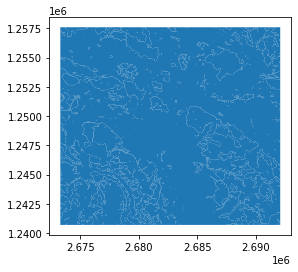

In [4]:
# Musterlösung

wald = gpd.read_file("data/wald.gpkg")

wald
type(wald)
wald.plot()

(ex-spatialjoin)=
### Übung 15.2

Führe einen SpatialJoin zwischen `wald` und `zeckenstiche` durch. Vertausche die Reihenfolge (`left_df`, `right_df`) und schaue dir den Output an. Wodurch unterscheiden sich die beiden outputs? Was sagt dir das über die Funktionsweise von `sjoin`?


```{admonition} Wichtig!
:class: attention
Melde dich bei den Betreuern wenn der *SpatialJoin* bei dir nicht funktioniert und du eine Fehlermeldung bekommst.
```


In [5]:
# Musterlösung

gpd.sjoin(left_df = zeckenstiche_gpd, right_df = wald)
gpd.sjoin(left_df = wald, right_df = zeckenstiche_gpd) 

# in beiden Fällen hat der Output geich viele Zeilen. In der ersten Variante ist die Geometrie
# des Outputs "Point", im zweiten Fall "Multipolygon"

,Shape_Area,Wald_text,geometry,index_right,ID,accuracy,x,y
0,2.380876e+08,nein,MULTIPOLYGON Z (((2692100.000 1256542.253 276....,0,2550,439.128951,2681116,1250648
0,2.380876e+08,nein,MULTIPOLYGON Z (((2692100.000 1256542.253 276....,1,10437,301.748542,2681092,1250672
0,2.380876e+08,nein,MULTIPOLYGON Z (((2692100.000 1256542.253 276....,3,8773,301.748542,2681111,1250683
0,2.380876e+08,nein,MULTIPOLYGON Z (((2692100.000 1256542.253 276....,2,9174,301.748542,2681128,1250683
0,2.380876e+08,nein,MULTIPOLYGON Z (((2692100.000 1256542.253 276....,4,2764,301.748529,2681131,1250692
1,7.963237e+07,ja,MULTIPOLYGON Z (((2689962.355 1245335.250 644....,5,2513,301.748529,2681171,1250711
1,7.963237e+07,ja,MULTIPOLYGON Z (((2689962.355 1245335.250 644....,6,9185,301.748542,2681107,1250712
1,7.963237e+07,ja,MULTIPOLYGON Z (((2689962.355 1245335.250 644....,7,28521,301.748542,2681124,1250720
1,7.963237e+07,ja,MULTIPOLYGON Z (((2689962.355 1245335.250 644....,8,26745,301.748542,2681117,1250725
1,7.963237e+07,ja,MULTIPOLYGON Z (((2689962.355 1245335.250 644....,9,27391,301.748542,2681138,1250725


### Übung 15.3

Führe nun den SpatialJoin aus {ref}`ex-spatialjoin` in der Reihenfolge aus, der dir am sinnvollsten erscheint. Weise den Output dieser Operation der Variabel `zeckenstiche_join` zu.

Nutze nun die dazugewonnene Spalte `Wald_text` um die Anzahl Zeckenstich-Meldungen *im Wald* zu zählen. Dazu musst du wie folgt vorgehen: 

1. Entsprechende Spalte selektieren (siehe {ref}`ex-sel-col`)
2. Werte in der Spalte mit "ja" vergleichen
3. Anzahl `True` mit `sum()` zählen (`True` entspricht immer `1`, `False` entspricht immer `0`)


In [19]:
# Musterlösung

zeckenstiche_join = gpd.sjoin(left_df = zeckenstiche_gpd, right_df = wald)

sum(zeckenstiche_join["Wald_text"] == "ja")

5

### Übung 15.4

Berechne nun *Anteil* der Zeckenstiche im Wald (gemessen an der Anzahl Zeckenstich-Meldungen total). Weise den Output der Variabel `anteil_wald` zu.

In [24]:
# Musterlösung

anteil_wald = sum(zeckenstiche_join["Wald_text"] == "ja")/len(zeckenstiche_join["Wald_text"])